ChEn-3170: Computational Methods in Chemical Engineering Spring 2020 UMass Lowell; Prof. V. F. de Almeida **23Mar20**

# 09b. Rank-Deficient Least-Squares Reaction Rates
$  
  \newcommand{\Amtrx}{\boldsymbol{\mathsf{A}}}
  \newcommand{\Bmtrx}{\boldsymbol{\mathsf{B}}}
  \newcommand{\Mmtrx}{\boldsymbol{\mathsf{M}}}
  \newcommand{\Imtrx}{\boldsymbol{\mathsf{I}}}
  \newcommand{\Pmtrx}{\boldsymbol{\mathsf{P}}}
  \newcommand{\Lmtrx}{\boldsymbol{\mathsf{L}}}
  \newcommand{\Umtrx}{\boldsymbol{\mathsf{U}}}
  \newcommand{\Smtrx}{\boldsymbol{\mathsf{S}}}
  \newcommand{\xvec}{\boldsymbol{\mathsf{x}}}
  \newcommand{\avec}{\boldsymbol{\mathsf{a}}}
  \newcommand{\bvec}{\boldsymbol{\mathsf{b}}}
  \newcommand{\cvec}{\boldsymbol{\mathsf{c}}}
  \newcommand{\rvec}{\boldsymbol{\mathsf{r}}}
  \newcommand{\mvec}{\boldsymbol{\mathsf{m}}}
  \newcommand{\gvec}{\boldsymbol{\mathsf{g}}}
  \newcommand{\zerovec}{\boldsymbol{\mathsf{0}}}
  \newcommand{\norm}[1]{\bigl\lVert{#1}\bigr\rVert}
  \newcommand{\transpose}[1]{{#1}^\top}
  \DeclareMathOperator{\rank}{rank}
$

---
## Table of Contents
* [Rank-Deficient Reaction mechanism](#rxnmech)
* [Full-Rank Reaction Sub-Mechanisms](#submech)
* [Full-Rank Least-Squares Reaction Rates](#lsr)
* [Residuals of All Sub-Mechanisms](#residuals)
* [Rank-Deficient Least-Squares Reaction Rate Solution](#rankdef)
---

## Rank-deficient reaction mechanism<a id="rxnmech"></a>
Refer to course Notebook 09.

In [1]:
'''Read a reaction mechanism and create data structures'''

from chen_3170.toolkit import reaction_mechanism # replace with your code

# build the stoichiometric matrix
(species, reactions, stoic_mtrx, dummy, dummy) = reaction_mechanism('data/nox-rxn.txt')

print(species)
from chen_3170.help import print_reactions
print_reactions(reactions)

['O2', 'NO3', 'NO', 'N2O5', 'N2O4', 'NO2']
r0 :  2 N2O5       <=> 2 N2O4 + O2
r1 :  N2O5       <=>   NO2 + NO3
r2 :  NO2 + NO3  <=>   N2O5
r3 :  NO3        <=>   O2 + NO
r4 :  NO + N2O5  <=> 3 NO2
r5 :  2 NO2        <=>   N2O4
n_reactions = 6


matrix shape = (6, 6)


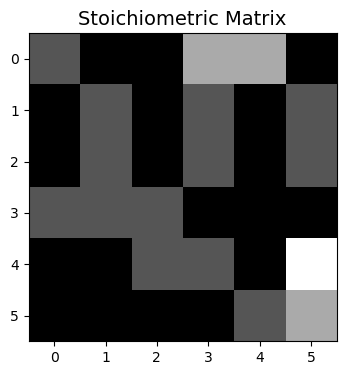

stoic_mtrx=
 [[ 1.  0.  0. -2.  2.  0.]
 [ 0.  1.  0. -1.  0.  1.]
 [ 0. -1.  0.  1.  0. -1.]
 [ 1. -1.  1.  0.  0.  0.]
 [ 0.  0. -1. -1.  0.  3.]
 [ 0.  0.  0.  0.  1. -2.]]

mole balance vector =
 [ 1.  1. -1.  1.  1. -1.]


In [2]:
'''Check the stoichiometric matrix'''

from chen_3170.help import plot_matrix

plot_matrix(stoic_mtrx, title='Stoichiometric Matrix')
import numpy as np
np.set_printoptions(precision=3,threshold=100,edgeitems=5)
print('stoic_mtrx=\n',stoic_mtrx)
print('')
print('mole balance vector =\n', stoic_mtrx.sum(1))

## Full-rank, reaction sub-mechanisms<a id="submech"></a>
Refer to course Notebook 07.

In [3]:
'''Build the full-rank sub-mechanism reactions list'''

from chen_3170.toolkit import sub_mechanisms # replace with your code

sub_mechanisms = sub_mechanisms( species, reactions, stoic_mtrx )

# reactions =  6
# species   =  6
rank of S =  4
# of all possible sub_mechanisms = 15
# of full-rank sub_mechanisms = 9


In [4]:
'''Top reaction sub-mechanism'''

sub_mechanism_1 = sub_mechanisms[0]
print(sub_mechanism_1)

[(0, 3, 4, 5), ['2 N2O5       <=> 2 N2O4 + O2', 'NO3        <=>   O2 + NO', 'NO + N2O5  <=> 3 NO2', '2 NO2        <=>   N2O4'], array([[ 1.,  0.,  0., -2.,  2.,  0.],
       [ 1., -1.,  1.,  0.,  0.,  0.],
       [ 0.,  0., -1., -1.,  0.,  3.],
       [ 0.,  0.,  0.,  0.,  1., -2.]]), 10.0]


In [5]:
'''Top reaction sub-mechanism stoichiometric matrix'''

stoic_mtrx_1 = sub_mechanism_1[2]

#( dummy, dummy, stoic_mtrx_1 ) = reaction_mechanism( reactions = reactions_1 ) # taking advantage of this function

#plot_matrix(stoic_mtrx_1, title='Sub-Mech 1')
print('S_1=\n',stoic_mtrx_1)

S_1=
 [[ 1.  0.  0. -2.  2.  0.]
 [ 1. -1.  1.  0.  0.  0.]
 [ 0.  0. -1. -1.  0.  3.]
 [ 0.  0.  0.  0.  1. -2.]]


In [6]:
'''Another top reaction sub-mechanism'''

sub_mechanism_2 = sub_mechanisms[1]
print(sub_mechanism_2)

[(0, 1, 3, 4), ['2 N2O5       <=> 2 N2O4 + O2', 'N2O5       <=>   NO2 + NO3', 'NO3        <=>   O2 + NO', 'NO + N2O5  <=> 3 NO2'], array([[ 1.,  0.,  0., -2.,  2.,  0.],
       [ 0.,  1.,  0., -1.,  0.,  1.],
       [ 1., -1.,  1.,  0.,  0.,  0.],
       [ 0.,  0., -1., -1.,  0.,  3.]]), 8.928571428571429]


In [7]:
'''Another top reaction sub-mechanism stoichiometric matrix'''

stoic_mtrx_2 = sub_mechanism_2[2]

#( dummy, dummy, stoic_mtrx_2 ) = reaction_mechanism( reactions = reactions_2 ) # taking advantage of this function

#plot_matrix(stoic_mtrx_1, title='Sub-Mech 2')
print('S_2=\n',stoic_mtrx_2)

S_2=
 [[ 1.  0.  0. -2.  2.  0.]
 [ 0.  1.  0. -1.  0.  1.]
 [ 1. -1.  1.  0.  0.  0.]
 [ 0.  0. -1. -1.  0.  3.]]


## Full-rank least-squares reaction rates<a id="lsr"></a>
Refer to course Notebook 07.

In [8]:
'''Assume a species production rate as random'''

import numpy as np
g_vec = np.random.random(len(species))

Here, let's compute $\rvec_1$ for 
$
\Smtrx_1\,\Smtrx_1^\top\,\rvec_1  = \Smtrx_1\,\gvec .
$

In [9]:
'''Compute the LS reaction rates for random species production rates'''

# build A x = b LS problem
a_mtrx = stoic_mtrx_1 @ stoic_mtrx_1.transpose() # A = S ST, A is the normal matrix
b_vec  = stoic_mtrx_1 @ g_vec                    # b = S g

from chen_3170.toolkit import lu_factorization # replace with your code

# matrix LU factorization of A, the normal matrix
(L, U, P, s_rank) = lu_factorization(a_mtrx, 'partial') # matrix is full rank; partial pivoting works
assert s_rank == np.linalg.matrix_rank(stoic_mtrx_1)

from chen_3170.help import forward_solve
from chen_3170.toolkit import backward_solve # replace with your code

# solve the LS problem: A x = b
y_vec = forward_solve( L, P @ b_vec)   # L y = P b
x_vec = backward_solve( U, y_vec)      # U x = y
assert np.linalg.norm(x_vec - np.linalg.solve(a_mtrx,b_vec)) < 1e-12

print('species production rates g_vec =',g_vec)

r_vec_1 = x_vec # r_1 = x
print('reaction rates r_vec_1=',r_vec_1)
residual_vec_1 = g_vec - stoic_mtrx_1.transpose() @ r_vec_1
print('residual norm g - ST_1 r_1 = %8.5e'%np.linalg.norm(residual_vec_1))

species production rates g_vec = [0.802 0.169 0.952 0.977 0.914 0.944]
reaction rates r_vec_1= [ 0.128  0.453 -0.099 -0.364]
residual norm g - ST_1 r_1 = 1.78566e+00


In [10]:
'''Which reaction rates are these?'''

from chen_3170.help import print_reactions

print_reactions(sub_mechanism_1[1])
print(sub_mechanism_1[0])
print('')
print_reactions(reactions)

r0 :  2 N2O5       <=> 2 N2O4 + O2
r1 :  NO3        <=>   O2 + NO
r2 :  NO + N2O5  <=> 3 NO2
r3 :  2 NO2        <=>   N2O4
n_reactions = 4
(0, 3, 4, 5)

r0 :  2 N2O5       <=> 2 N2O4 + O2
r1 :  N2O5       <=>   NO2 + NO3
r2 :  NO2 + NO3  <=>   N2O5
r3 :  NO3        <=>   O2 + NO
r4 :  NO + N2O5  <=> 3 NO2
r5 :  2 NO2        <=>   N2O4
n_reactions = 6


Here, let's compute $\rvec_2$ for 
$
\Smtrx_2\,\Smtrx_2^\top\,\rvec_2  = \Smtrx_2\,\gvec .
$

In [11]:
'''Compute the LS reaction rates for random species production rates'''

# build A x = b LS problem
a_mtrx = stoic_mtrx_2 @ stoic_mtrx_2.transpose() # A = S ST, A is the normal matrix
b_vec  = stoic_mtrx_2 @ g_vec                    # b = S g

from chen_3170.toolkit import lu_factorization # replace with your code

# matrix LU factorization of A
(L, U, P, s_rank) = lu_factorization(a_mtrx, 'partial') # matrix is full rank; partial pivoting works
assert s_rank == np.linalg.matrix_rank(stoic_mtrx_2)

from chen_3170.help import forward_solve
from chen_3170.toolkit import backward_solve # replace with your code

# solve the LS problem: A x = b
y_vec = forward_solve( L, P @ b_vec )
x_vec = backward_solve( U, y_vec )
assert np.linalg.norm(x_vec - np.linalg.solve(a_mtrx,b_vec)) < 1e-12

print('species production rates g_vec =',g_vec)

r_vec_2 = x_vec # r_2 = x
print('reaction rates r_vec_2=',r_vec_2)
residual_vec_2 = g_vec - stoic_mtrx_2.transpose() @ r_vec_2
print('residual norm g - ST_2 r_2 = %8.5e'%np.linalg.norm(residual_vec_2))

species production rates g_vec = [0.802 0.169 0.952 0.977 0.914 0.944]
reaction rates r_vec_2= [-0.055  0.182  0.635  0.083]
residual norm g - ST_2 r_2 = 1.78566e+00


In [12]:
'''Which reaction rates are these?'''

from chen_3170.help import print_reactions

print_reactions(sub_mechanism_2[1])
print(sub_mechanism_2[0])
print('')
print_reactions(reactions)

r0 :  2 N2O5       <=> 2 N2O4 + O2
r1 :  N2O5       <=>   NO2 + NO3
r2 :  NO3        <=>   O2 + NO
r3 :  NO + N2O5  <=> 3 NO2
n_reactions = 4
(0, 1, 3, 4)

r0 :  2 N2O5       <=> 2 N2O4 + O2
r1 :  N2O5       <=>   NO2 + NO3
r2 :  NO2 + NO3  <=>   N2O5
r3 :  NO3        <=>   O2 + NO
r4 :  NO + N2O5  <=> 3 NO2
r5 :  2 NO2        <=>   N2O4
n_reactions = 6


Note that the sub-mechanisms rates $\rvec_1$ and $\rvec_2$ are different, but the corresponding residuals $\gvec - \Smtrx_1^\top\,\rvec_1$, and $\gvec - \Smtrx_2^\top\,\rvec_2$, are equal!

In [13]:
print('r_vec_1 - r_vec_2             =',r_vec_1 - r_vec_2)
np.set_printoptions(precision=3)
print('g - ST_1 r_1 - (g - ST_2 r_2) =',(g_vec-stoic_mtrx_1.transpose()@r_vec_1)-(g_vec-stoic_mtrx_2.transpose()@r_vec_2))

r_vec_1 - r_vec_2             = [ 0.182  0.271 -0.734 -0.448]
g - ST_1 r_1 - (g - ST_2 r_2) = [-1.11e-16  1.11e-16  0.00e+00  0.00e+00 -2.22e-16 -1.11e-16]


## Residuals of all sub-mechanisms<a id="residuals"></a>
Let us verify the previous residual result for all sub-mechanims. Here we will compute $\Smtrx_k$ for $k=1,\ldots,$# of full-rank sub-mechanisms and the corresponding LS reaction rates $\rvec_k$ and residuals


\begin{equation*}
\gvec - \Smtrx_k^\top\,\rvec_k .
\end{equation*}



In [14]:
'''Compute the LS residual for all full-rank reaction sub-mechanisms'''

import numpy as np

sub_mech_rxn_rates_mtrx = np.zeros( (s_rank,len(sub_mechanisms)) )       # column-wise storage of all r_k's
sub_mech_residuals_mtrx = np.zeros( (len(species),len(sub_mechanisms)) ) # column-wise storage of all g - ST_k r_k

np.set_printoptions(precision=2)

for sub_mech in sub_mechanisms:
    
    stoic_mtrx_k = sub_mech[2] # view of stoichiometric matrix for sub-mechanism
  
    # assemble LS problem matrix and right side
    a_mtrx = stoic_mtrx_k @ stoic_mtrx_k.transpose()  # A = S ST, A is the normal matrix
    b_vec  = stoic_mtrx_k @ g_vec                     # b = S g

    # matrix LU factorization of A
    (L, U, P, s_rank) = lu_factorization(a_mtrx, 'partial') # matrix is full rank; partial pivoting works
    assert s_rank == np.linalg.matrix_rank(stoic_mtrx_k)

    # solve the LS problem: A x = b
    y_vec = forward_solve( L, P @ b_vec)  # L y = P b
    x_vec = backward_solve( U, y_vec)     # U x = y
    assert np.linalg.norm(x_vec - np.linalg.solve(a_mtrx,b_vec)) < 1e-12
    
    r_vec = x_vec  # r = x
    sub_mech_rxn_rates_mtrx[:,sub_mechanisms.index(sub_mech)] = r_vec
    
    print('rxns ids =',sub_mech[0])
    print('       r =', r_vec)
    
    rate_norm = np.linalg.norm(r_vec)
    print('   ||r|| = %8.3e'%rate_norm)
    
    residual = g_vec - stoic_mtrx_k.transpose() @ r_vec
    sub_mech_residuals_mtrx[:,sub_mechanisms.index(sub_mech)] = residual
    print('g - ST r     =',residual)
    print('||g - ST r|| = %8.3e'%np.linalg.norm(residual))
    print('')


rxns ids = (0, 3, 4, 5)
       r = [ 0.13  0.45 -0.1  -0.36]
   ||r|| = 6.033e-01
g - ST r     = [0.22 0.62 0.4  1.13 1.02 0.51]
||g - ST r|| = 1.786e+00

rxns ids = (0, 1, 3, 4)
       r = [-0.05  0.18  0.64  0.08]
   ||r|| = 6.683e-01
g - ST r     = [0.22 0.62 0.4  1.13 1.02 0.51]
||g - ST r|| = 1.786e+00

rxns ids = (0, 1, 3, 5)
       r = [ 0.03  0.1   0.55 -0.17]
   ||r|| = 5.855e-01
g - ST r     = [0.22 0.62 0.4  1.13 1.02 0.51]
||g - ST r|| = 1.786e+00

rxns ids = (0, 1, 4, 5)
       r = [ 0.58 -0.45 -0.55 -1.27]
   ||r|| = 1.569e+00
g - ST r     = [0.22 0.62 0.4  1.13 1.02 0.51]
||g - ST r|| = 1.786e+00

rxns ids = (0, 2, 3, 4)
       r = [-0.05 -0.18  0.64  0.08]
   ||r|| = 6.683e-01
g - ST r     = [0.22 0.62 0.4  1.13 1.02 0.51]
||g - ST r|| = 1.786e+00

rxns ids = (0, 2, 3, 5)
       r = [ 0.03 -0.1   0.55 -0.17]
   ||r|| = 5.855e-01
g - ST r     = [0.22 0.62 0.4  1.13 1.02 0.51]
||g - ST r|| = 1.786e+00

rxns ids = (0, 2, 4, 5)
       r = [ 0.58  0.45 -0.55 -1.27]
   ||r|| 

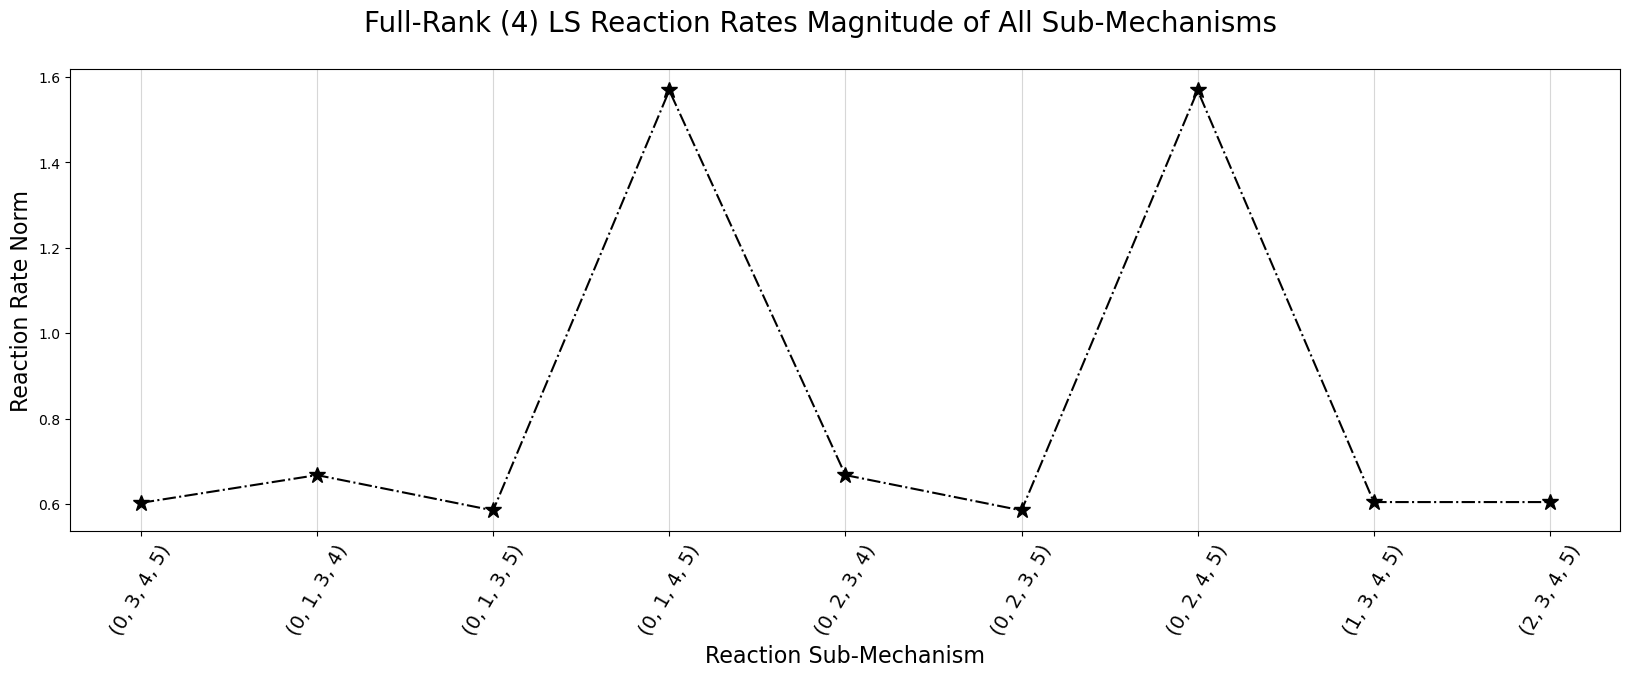

In [15]:
'''Plot the LS reaction rates for all full-rank sub-mechanisms'''

from matplotlib import pyplot as plt # import the pyplot function of the matplotlib package
fig, ax = plt.subplots(figsize=(20,6))

ax.plot(range(sub_mech_rxn_rates_mtrx.shape[1]), np.linalg.norm(sub_mech_rxn_rates_mtrx,axis=0), 
        '-.',color='black', marker='*',markersize=12)

plt.xticks(range(sub_mech_rxn_rates_mtrx.shape[1]),[sm[0] for sm in sub_mechanisms],rotation=60,fontsize=14)
ax.set_ylabel('Reaction Rate Norm',fontsize=16)
ax.set_xlabel('Reaction Sub-Mechanism',fontsize=16)
ax.xaxis.grid(True,linestyle='-',which='major',color='lightgrey',alpha=0.9)
fig.suptitle('Full-Rank (%i) LS Reaction Rates Magnitude of All Sub-Mechanisms'%(s_rank),fontsize=20)
plt.show()

In [16]:
'''Print the LS reaction rate with minimum norm (unique)'''

rate_min = np.linalg.norm(sub_mech_rxn_rates_mtrx,axis=0).min()
idx_min = np.argmin( np.linalg.norm(sub_mech_rxn_rates_mtrx,axis=0) )
print('sub-mechanism id.              = %i'%idx_min)
print('minimum norm sub-mech rxn rate = %8.4e'%rate_min)
print('sub-mechanism rxn id           =', sub_mechanisms[idx_min][0])
print_reactions(sub_mechanisms[idx_min][1])
print('sub-mechanism rxn score        = %4.2f'%sub_mechanisms[idx_min][3])

sub-mechanism id.              = 2
minimum norm sub-mech rxn rate = 5.8552e-01
sub-mechanism rxn id           = (0, 1, 3, 5)
r0 :  2 N2O5       <=> 2 N2O4 + O2
r1 :  N2O5       <=>   NO2 + NO3
r2 :  NO3        <=>   O2 + NO
r3 :  2 NO2        <=>   N2O4
n_reactions = 4
sub-mechanism rxn score        = 8.93


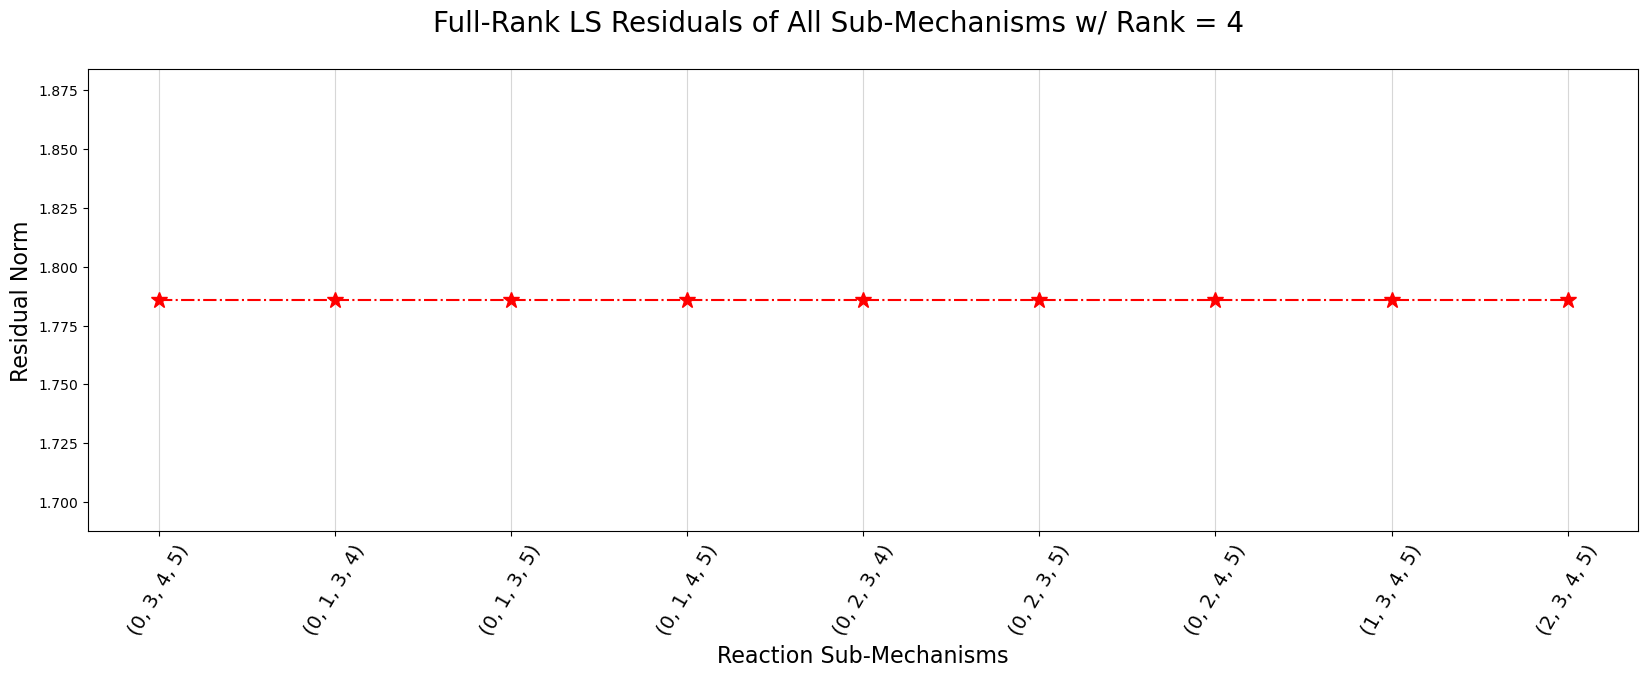

In [17]:
'''Plot the LS residual norms of all full-rank sub-mechanisms'''

from matplotlib import pyplot as plt # import the pyplot function of the matplotlib package
fig, ax = plt.subplots(figsize=(20,6))

ax.plot(range(sub_mech_residuals_mtrx.shape[1]), np.linalg.norm(sub_mech_residuals_mtrx,axis=0),
        '-.',color='red',marker='*',markersize=12)

plt.xticks(range(sub_mech_residuals_mtrx.shape[1]),[smr[0] for smr in sub_mechanisms],rotation=60,fontsize=14)
ax.set_ylabel('Residual Norm',fontsize=16)
ax.set_xlabel('Reaction Sub-Mechanisms',fontsize=16)
ax.xaxis.grid(True,linestyle='-',which='major',color='lightgrey',alpha=0.9)
fig.suptitle('Full-Rank LS Residuals of All Sub-Mechanisms w/ Rank = '+str(s_rank),fontsize=20)
plt.show()

## Rank-deficient least-squares reaction rate solution<a id="rankdef"></a>
Despite all the foregoing development, we have not solved the original problem yet, namely

\begin{equation*}
\Smtrx^\top\,\rvec = \gvec .
\end{equation*}

However this problem is related to the series of sub-mechanisms we just analyzed. To see this, assemble the matrix of sub-mechanism reaction rates mapped into the original reaction dimension $m$ by completing the additional entries with zeros. We denote this vector mapping $\rvec_k\longrightarrow\hat{\rvec}_k$ and the vectors 
$\hat{\rvec}_k$ as **basic** vectors. 

Then we show that all **basic** vectors produce the same residual vectors, that is:

\begin{equation*}
\gvec - \Smtrx^\top\,\hat{\rvec}_k
\end{equation*}

is invariant for any $\hat{\rvec}_k$ and has the same norm as the residuals $\gvec - \Smtrx_k^\top\,\rvec_k$. All residuals being equal, we choose the rank-deficient least-squares **basic** solution as the $\hat{\rvec}_k$ of minimum norm.

In [18]:
'''Map r_k --> \hat{r} rates'''

mech_rxn_rates_mtrx = np.zeros((len(reactions),len(sub_mechanisms)))

for sm in sub_mechanisms:
    sm_idx = sub_mechanisms.index(sm)
    rxn_idxs = sm[0]
    mech_rxn_rates_mtrx[rxn_idxs,sm_idx] = sub_mech_rxn_rates_mtrx[:,sm_idx] # map 

matrix shape = (6, 9)


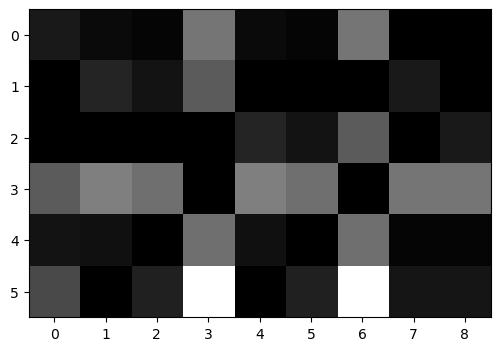

[[ 0.13 -0.05  0.03  0.58 -0.05  0.03  0.58  0.    0.  ]
 [ 0.    0.18  0.1  -0.45  0.    0.    0.    0.13  0.  ]
 [ 0.    0.    0.    0.   -0.18 -0.1   0.45  0.   -0.13]
 [ 0.45  0.64  0.55  0.    0.64  0.55  0.    0.58  0.58]
 [-0.1   0.08  0.   -0.55  0.08  0.   -0.55  0.03  0.03]
 [-0.36  0.   -0.17 -1.27  0.   -0.17 -1.27 -0.11 -0.11]]


In [19]:
'''Show the mapping in the form of a matrix'''

from chen_3170.help import plot_matrix

plot_matrix(mech_rxn_rates_mtrx)
np.set_printoptions(precision=2,threshold=100,edgeitems=5)
print(mech_rxn_rates_mtrx)

Compute $\gvec - \Smtrx^\top\,\hat{\rvec}_k$ for all $k$.

In [20]:
'''Subtract above from g column by column'''

np.set_printoptions(precision=3)

for j in range(mech_rxn_rates_mtrx.shape[1]):
    tmp = g_vec - (stoic_mtrx.transpose() @ mech_rxn_rates_mtrx)[:,j]
    print('residual k = %i'%j,tmp)

residual k = 0 [0.222 0.622 0.401 1.133 1.023 0.511]
residual k = 1 [0.222 0.622 0.401 1.133 1.023 0.511]
residual k = 2 [0.222 0.622 0.401 1.133 1.023 0.511]
residual k = 3 [0.222 0.622 0.401 1.133 1.023 0.511]
residual k = 4 [0.222 0.622 0.401 1.133 1.023 0.511]
residual k = 5 [0.222 0.622 0.401 1.133 1.023 0.511]
residual k = 6 [0.222 0.622 0.401 1.133 1.023 0.511]
residual k = 7 [0.222 0.622 0.401 1.133 1.023 0.511]
residual k = 8 [0.222 0.622 0.401 1.133 1.023 0.511]


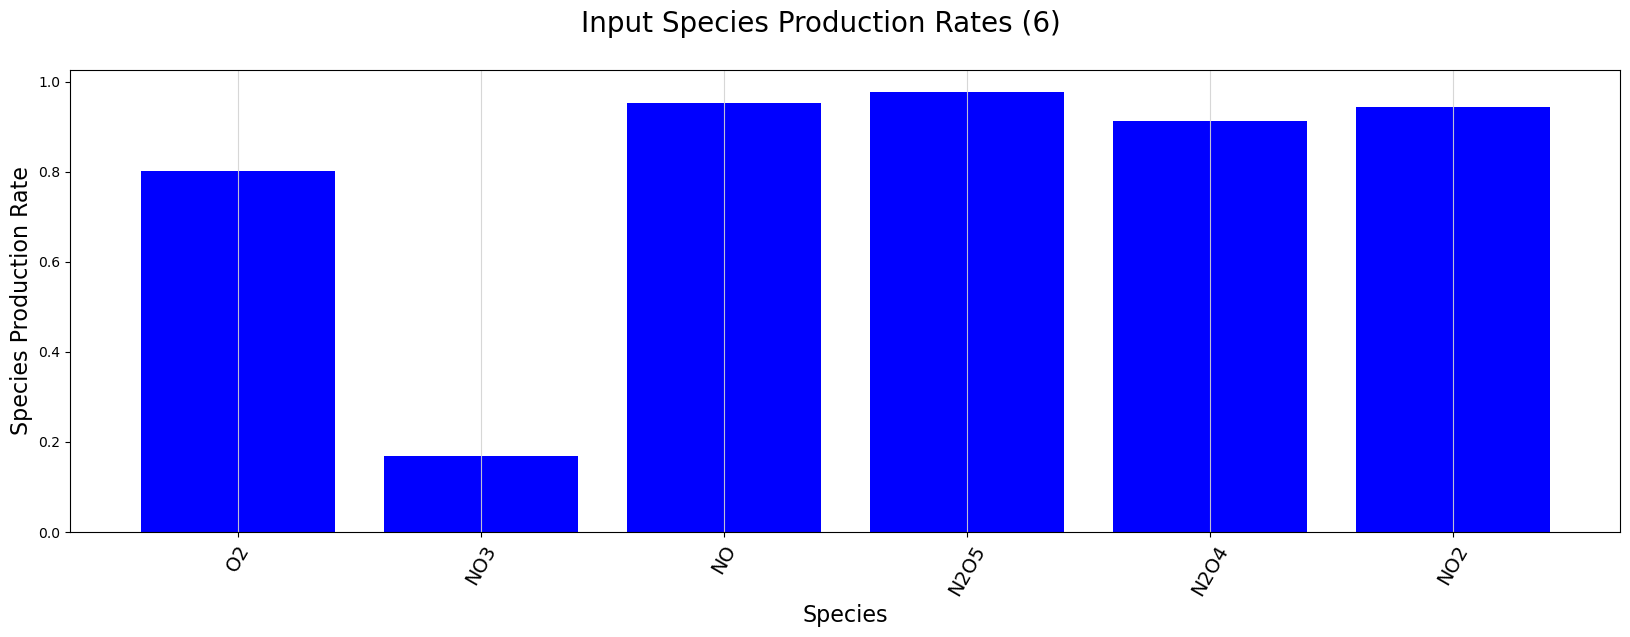

In [21]:
'''Plot of the input species production rate'''

from matplotlib import pyplot as plt # import the pyplot function of the matplotlib package
fig, ax = plt.subplots(figsize=(20,6))

ax.bar(range(len(species)), g_vec, color='blue')
plt.xticks(range(len(species)),species,rotation=60,fontsize=14)
ax.set_ylabel('Species Production Rate',fontsize=16)
ax.set_xlabel('Species',fontsize=16)
ax.xaxis.grid(True,linestyle='-',which='major',color='lightgrey',alpha=0.9)
fig.suptitle('Input Species Production Rates ('+str(len(species))+')',fontsize=20)
plt.show()

Select as **basic** solution of the rank-deficient LS problem: 

\begin{equation*}
\min\limits_k \norm{\hat{\rvec}_k} \quad\ \forall \quad\ k=1,\ldots,\text{# of full-rank sub-mechanisms} .
\end{equation*}

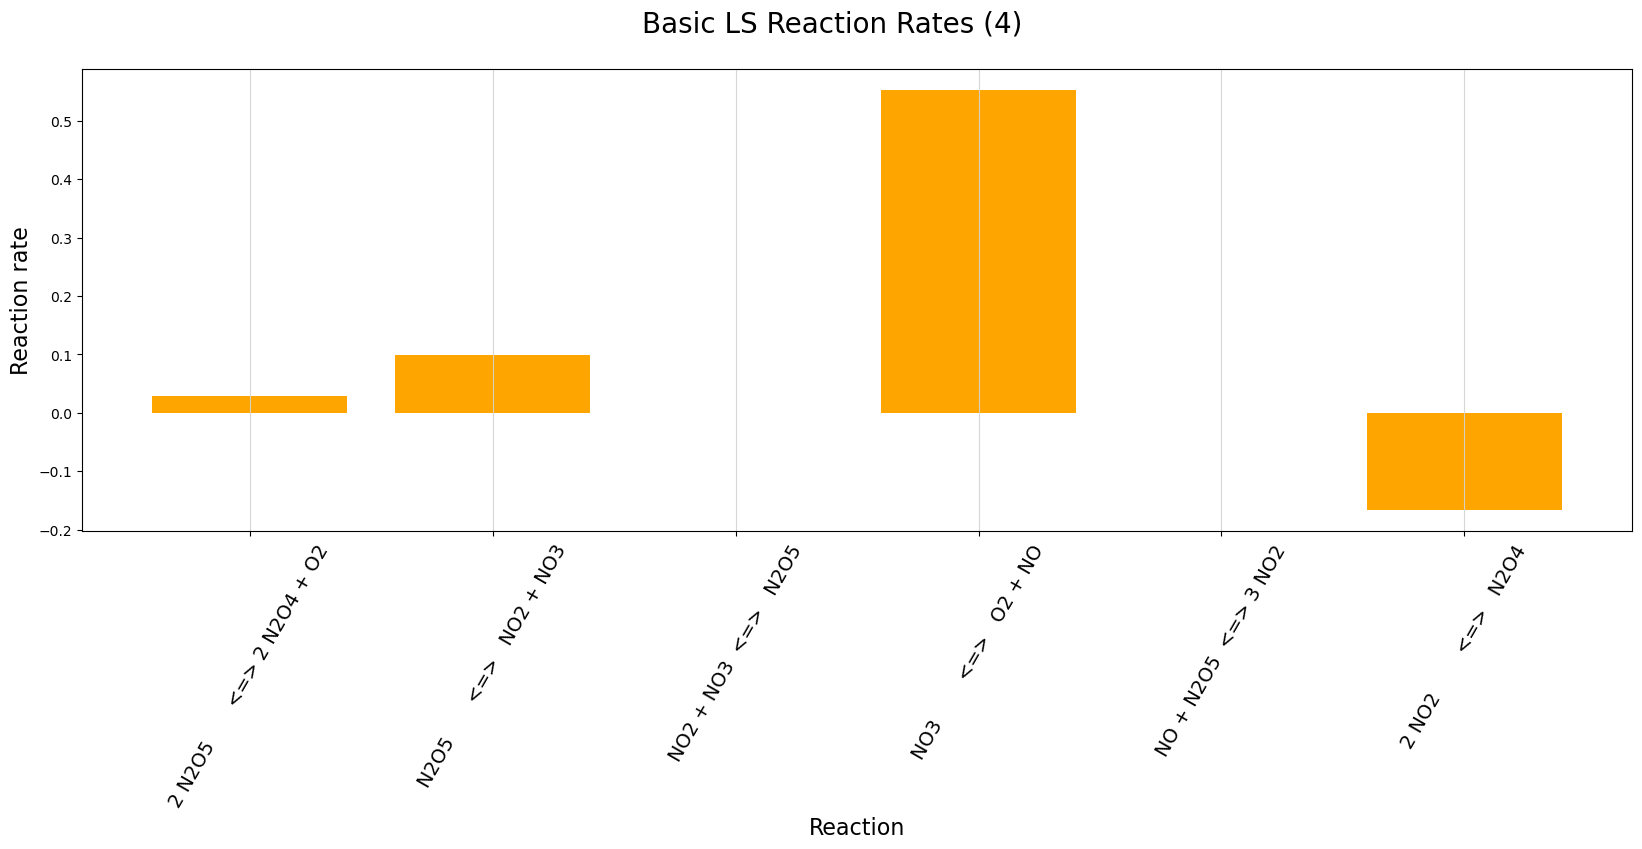

In [22]:
'''Basic least-squares reaction rates'''

from matplotlib import pyplot as plt # import the pyplot function of the matplotlib package

fig, ax = plt.subplots(figsize=(20,6))
ax.bar(range(len(reactions)), mech_rxn_rates_mtrx[:,idx_min], color='orange')
plt.xticks(range(len(reactions)),reactions,rotation=60,fontsize=14)
ax.set_ylabel('Reaction rate',fontsize=16)
ax.set_xlabel('Reaction',fontsize=16)
ax.xaxis.grid(True,linestyle='-',which='major',color='lightgrey',alpha=0.9)
fig.suptitle('Basic LS Reaction Rates (%s)'%str(s_rank),fontsize=20)
plt.show()